# **Загрязнение воздуха в городе Сеул, Южная Корея**



Исходный датасет - https://www.kaggle.com/datasets/bappekim/air-pollution-in-seoul/data

**Основные цели проекта:**

1.   Выявление общей тендеции изменения качества воздуха в Сеуле с течением времени. Сравнение качества воздуха с нормативными показателями.
2.   Анализ изменений в составе воздуха за определенные промежутки времени:

*   анализ суточных колебаний изменений концентраций загрязняющих веществ.
*   анализ сезонных колебаний.

3.   Исследование качества воздуха в районах Сеула. В частности, выявление самого "грязного" района и самого "чистого" района. Построение карты качества воздуха в Сеуле.
4.   Анализ корреляций между загрязняющими веществами.
5.   Прогнозирование уровня загрязнения.


**Актуальность проекта:** Проект по исследованию качества воздуха в Сеуле нужен, чтобы понять, насколько город безопасен для жизни и здоровья людей. Загрязнение воздуха влияет на лёгкие, сердце и общее самочувствие, особенно у детей и пожилых. Это важно для властей, чтобы принимать меры: ограничивать вредные производства, развивать общественный транспорт и зелёные зоны. Туристы и бизнес тоже заинтересованы — чистый воздух делает город привлекательнее. Учёные могут использовать данные для прогнозов и новых технологий мониторинга. В итоге такой проект помогает сделать Сеул комфортнее и безопаснее для всех.

**Датасет составлен на основе официальной публичной информации, предоставляемой правительством Южной Кореи, поэтому полученные в проекте результаты можно считать адекватными.**

In [ ]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 69.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.cm import ScalarMappable
import seaborn as sns
import numpy as np
import geopandas as gpd
import folium
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os
import datetime
import geopandas as gpd
import folium
from matplotlib.colors import Normalize
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df_summary = pd.read_csv('Measurement_summary.csv')
df_info = pd.read_csv('Measurement_info.csv')
df_item_info = pd.read_csv('Measurement_item_info.csv')
df_station_info = pd.read_csv('Measurement_station_info.csv')

## ***Краткий обзор датасета***

## **Анализ файла Measurement_summary.csv**

In [ ]:
print(df_summary.head())

   Measurement date  Station code  \
0  2017-01-01 00:00           101   
1  2017-01-01 01:00           101   
2  2017-01-01 02:00           101   
3  2017-01-01 03:00           101   
4  2017-01-01 04:00           101   

                                             Address   Latitude   Longitude  \
0  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008   
1  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008   
2  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008   
3  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008   
4  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008   

     SO2    NO2     O3   CO  PM10  PM2.5  
0  0.004  0.059  0.002  1.2  73.0   57.0  
1  0.004  0.058  0.002  1.2  71.0   59.0  
2  0.004  0.056  0.002  1.2  70.0   59.0  
3  0.004  0.056  0.002  1.2  70.0   58.0  
4  0.003  0.051  0.002  1.2  69.0   61.0  


In [ ]:
print(df_summary.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement date  647511 non-null  object 
 1   Station code      647511 non-null  int64  
 2   Address           647511 non-null  object 
 3   Latitude          647511 non-null  float64
 4   Longitude         647511 non-null  float64
 5   SO2               647511 non-null  float64
 6   NO2               647511 non-null  float64
 7   O3                647511 non-null  float64
 8   CO                647511 non-null  float64
 9   PM10              647511 non-null  float64
 10  PM2.5             647511 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 54.3+ MB
None


In [ ]:
print(df_summary.describe())

        Station code       Latitude      Longitude            SO2  \
count  647511.000000  647511.000000  647511.000000  647511.000000   
mean      113.000221      37.553484     126.989340      -0.001795   
std         7.211315       0.053273       0.078790       0.078832   
min       101.000000      37.452357     126.835151      -1.000000   
25%       107.000000      37.517528     126.927102       0.003000   
50%       113.000000      37.544962     127.004850       0.004000   
75%       119.000000      37.584848     127.047470       0.005000   
max       125.000000      37.658774     127.136792       3.736000   

                 NO2             O3             CO           PM10  \
count  647511.000000  647511.000000  647511.000000  647511.000000   
mean        0.022519       0.017979       0.509197      43.708051   
std         0.115153       0.099308       0.405319      71.137342   
min        -1.000000      -1.000000      -1.000000      -1.000000   
25%         0.016000       0.0080

In [ ]:
print(df_summary.isnull().sum())

Measurement date    0
Station code        0
Address             0
Latitude            0
Longitude           0
SO2                 0
NO2                 0
O3                  0
CO                  0
PM10                0
PM2.5               0
dtype: int64


## **Анализ файла Measurement_info.csv**

In [ ]:
print(df_info.head())

   Measurement date  Station code  Item code  Average value  Instrument status
0  2017-01-01 00:00           101          1          0.004                  0
1  2017-01-01 00:00           101          3          0.059                  0
2  2017-01-01 00:00           101          5          1.200                  0
3  2017-01-01 00:00           101          6          0.002                  0
4  2017-01-01 00:00           101          8         73.000                  0


In [ ]:
print(df_info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3885066 entries, 0 to 3885065
Data columns (total 5 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Measurement date   object 
 1   Station code       int64  
 2   Item code          int64  
 3   Average value      float64
 4   Instrument status  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 148.2+ MB
None


In [ ]:
print(df_info.describe())

       Station code     Item code  Average value  Instrument status
count  3.885066e+06  3.885066e+06   3.885066e+06       3.885066e+06
mean   1.130002e+02  5.333333e+00   1.161132e+01       1.471890e-01
std    7.211310e+00  2.748737e+00   3.816098e+01       1.021642e+00
min    1.010000e+02  1.000000e+00  -1.000000e+00       0.000000e+00
25%    1.070000e+02  3.000000e+00   1.200000e-02       0.000000e+00
50%    1.130000e+02  5.500000e+00   7.000000e-02       0.000000e+00
75%    1.190000e+02  8.000000e+00   1.500000e+01       0.000000e+00
max    1.250000e+02  9.000000e+00   6.256000e+03       9.000000e+00


In [ ]:
print(df_info.isnull().sum())

Measurement date     0
Station code         0
Item code            0
Average value        0
Instrument status    0
dtype: int64


## **Анализ файла Measurement_item_info.csv**

In [ ]:
print(df_item_info.head())

   Item code Item name Unit of measurement  Good(Blue)  Normal(Green)  \
0          1       SO2                 ppm        0.02           0.05   
1          3       NO2                 ppm        0.03           0.06   
2          5        CO                 ppm        2.00           9.00   
3          6        O3                 ppm        0.03           0.09   
4          8      PM10       Mircrogram/m3       30.00          80.00   

   Bad(Yellow)  Very bad(Red)  
0         0.15            1.0  
1         0.20            2.0  
2        15.00           50.0  
3         0.15            0.5  
4       150.00          600.0  


In [ ]:
print(df_item_info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item code            6 non-null      int64  
 1   Item name            6 non-null      object 
 2   Unit of measurement  6 non-null      object 
 3   Good(Blue)           6 non-null      float64
 4   Normal(Green)        6 non-null      float64
 5   Bad(Yellow)          6 non-null      float64
 6   Very bad(Red)        6 non-null      float64
dtypes: float64(4), int64(1), object(2)
memory usage: 468.0+ bytes
None


In [ ]:
print(df_item_info.describe())

       Item code  Good(Blue)  Normal(Green)  Bad(Yellow)  Very bad(Red)
count   6.000000    6.000000       6.000000     6.000000       6.000000
mean    5.333333    7.846667      20.700000    40.083333     192.250000
std     3.011091   12.325430      32.047072    61.171960     279.551382
min     1.000000    0.020000       0.050000     0.150000       0.500000
25%     3.500000    0.030000       0.067500     0.162500       1.250000
50%     5.500000    1.015000       4.545000     7.600000      26.000000
75%     7.500000   11.750000      28.500000    60.000000     387.500000
max     9.000000   30.000000      80.000000   150.000000     600.000000


In [ ]:
print(df_item_info.isnull().sum())

Item code              0
Item name              0
Unit of measurement    0
Good(Blue)             0
Normal(Green)          0
Bad(Yellow)            0
Very bad(Red)          0
dtype: int64


## **Анализ файла Measurement_station_info.csv**

In [ ]:
air_quality_parameters = df_item_info.set_index('Item name')

In [ ]:
air_quality_parameters.head(6)

,Item code,Unit of measurement,Good(Blue),Normal(Green),Bad(Yellow),Very bad(Red)
Item name,,,,,,
SO2,1,ppm,0.02,0.05,0.15,1.0
NO2,3,ppm,0.03,0.06,0.20,2.0
CO,5,ppm,2.00,9.00,15.00,50.0
O3,6,ppm,0.03,0.09,0.15,0.5
PM10,8,Mircrogram/m3,30.00,80.00,150.00,600.0
PM2.5,9,Mircrogram/m3,15.00,35.00,75.00,500.0


Предельно допустимые уровни содержания загрязняющих веществ в воздухе за сутки (24 часа)

In [ ]:
critical_concentrations_daily = {
    'SO2': 100,
    'NO2': 200,
    'CO': 35000,
    'O3': 100,
    'PM10': 50,
    'PM2.5': 25
}

Станции

In [ ]:
df_station_info.head()

,Station code,Station name(district),Address,Latitude,Longitude
0,101,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008
1,102,Jung-gu,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676
2,103,Yongsan-gu,"136, Hannam-daero, Yongsan-gu, Seoul, Republic...",37.540033,127.004850
3,104,Eunpyeong-gu,"215, Jinheung-ro, Eunpyeong-gu, Seoul, Republi...",37.609823,126.934848
4,105,Seodaemun-gu,"32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul,...",37.593742,126.949679


Необработанные данные

In [ ]:
df_info.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Station code,3885066.0,113.000221,7.211310,101.0,107.000,113.00,119.0,125.0
Item code,3885066.0,5.333333,2.748737,1.0,3.000,5.50,8.0,9.0
Average value,3885066.0,11.611324,38.160981,-1.0,0.012,0.07,15.0,6256.0
Instrument status,3885066.0,0.147189,1.021642,0.0,0.000,0.00,0.0,9.0


Текущий набор данных:

0: В норме, 1: Требуется калибровка, 2: Нештатная ситуация
4: Отключено питание, 8: Ремонтируется, 9: нештатные данные

In [ ]:
df_info['Instrument status'].value_counts() / df_info.shape[0] * 100

,count
Instrument status,
0,97.186972
8,0.832444
1,0.764903
4,0.585627
9,0.527404
2,0.102649


Поскольку "обычные" данные составляют 97% данных, оставшиеся 3% ненадежных данных можно безопасно удалить.

In [ ]:
data = df_info[df_info['Instrument status'] == 0].pivot(index=['Measurement date', 'Station code'], columns='Item code', values='Average value')
data = data.reset_index().rename(columns={x['Item code']: index for index, x in air_quality_parameters.iterrows()})

data['Measurement date'] = pd.to_datetime(data['Measurement date'],format='%Y-%m-%d %H:%M')
data['Date'] = data['Measurement date'].apply(lambda x: x.date())
data['year'] = data['Measurement date'].apply(lambda x: x.year)
data['month'] = data['Measurement date'].apply(lambda x: x.month)
data['day'] = data['Measurement date'].apply(lambda x: x.day)
data['DOY'] = data['Measurement date'].apply(lambda x: x.day_of_year)
data['hour'] = data['Measurement date'].apply(lambda x: x.hour)
data['DOW'] = data['Measurement date'].apply(lambda x: x.day_of_week)

data.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Item code,,,,,,,,
Measurement date,637199,2018-06-25 16:54:43.428881408,2017-01-01 00:00:00,2017-09-25 07:00:00,2018-06-22 15:00:00,2019-03-27 10:00:00,2019-12-31 23:00:00,NaN
Station code,637199.0,113.020039,101.0,107.0,113.0,119.0,125.0,7.213189
SO2,630744.0,0.004321,0.001,0.003,0.004,0.005,0.041,0.001669
NO2,632564.0,0.028642,0.0,0.016,0.025,0.038,0.123,0.015967
CO,629784.0,0.516451,0.0,0.4,0.5,0.6,3.2,0.23962
O3,631120.0,0.024363,0.0,0.009,0.021,0.035,0.215,0.019112
PM10,624408.0,41.798675,1.0,23.0,35.0,53.0,470.0,29.299224
PM2.5,627158.0,24.081037,1.0,12.0,19.0,31.0,205.0,18.847195
year,637199.0,2017.980912,2017.0,2017.0,2018.0,2019.0,2019.0,0.813402


Берется не среднее значение по сезонам, а дневные максимумы. Поскольку уровень высокого риска любого загрязняющего вещества, даже если он наблюдается только в течение части дня, можно рассматривать для обозначения всего дня как плохое качество воздуха. Это также высветит любые аномалии в данных.

In [ ]:
data_daily = data.groupby(['Date', 'Station code']).max().reset_index().groupby('Date').mean().reset_index().drop(['Station code'], axis=1)

In [ ]:
sns.set_style('darkgrid')
sns.set_palette('mako')

grade_names = ['Good(Blue)',	'Normal(Green)',	'Bad(Yellow)',	'Very bad(Red)']
parameter_names = ['SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']

grade_palette = sns.color_palette("hls", 8)
grade_palette = [grade_palette[4], grade_palette[2], grade_palette[1], grade_palette[0]]

In [ ]:
air_quality_parameters

,Item code,Unit of measurement,Good(Blue),Normal(Green),Bad(Yellow),Very bad(Red)
Item name,,,,,,
SO2,1,ppm,0.02,0.05,0.15,1.0
NO2,3,ppm,0.03,0.06,0.20,2.0
CO,5,ppm,2.00,9.00,15.00,50.0
O3,6,ppm,0.03,0.09,0.15,0.5
PM10,8,Mircrogram/m3,30.00,80.00,150.00,600.0
PM2.5,9,Mircrogram/m3,15.00,35.00,75.00,500.0


SO2: {'Good(Blue)': '100%'}
NO2: {'Good(Blue)': '16%', 'Normal(Green)': '64%', 'Bad(Yellow)': '20%'}
O3: {'Good(Blue)': '26%', 'Normal(Green)': '70%', 'Bad(Yellow)': '4%', 'Very bad(Red)': '0%'}
CO: {'Good(Blue)': '100%'}
PM10: {'Good(Blue)': '13%', 'Normal(Green)': '63%', 'Bad(Yellow)': '21%', 'Very bad(Red)': '3%'}
PM2.5: {'Good(Blue)': '8%', 'Normal(Green)': '46%', 'Bad(Yellow)': '39%', 'Very bad(Red)': '7%'}


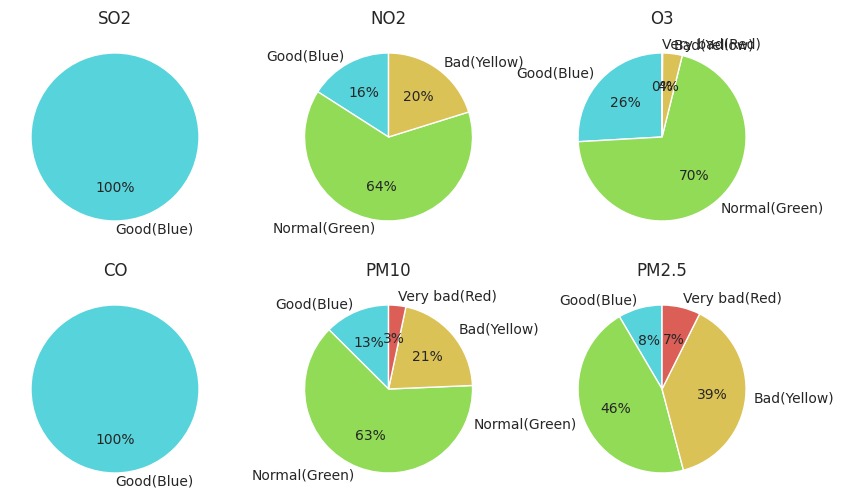

In [ ]:
def grade_value(value, ranges):
  if value is None or np.isnan(value):
    return np.nan
  for i, g in enumerate(grade_names):
    if value < ranges[g]:
      return i
  return 3

data_graded = np.zeros((len(parameter_names), data_daily.shape[0]), dtype=int)
for i, p in enumerate(parameter_names):
  ranges = air_quality_parameters.loc[p]
  for j in range(data_daily.shape[0]):
    data_graded[i, j] = grade_value(data_daily[p][j], ranges)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

for i, p in enumerate(parameter_names):
  grade_values, grade_counts = np.unique(data_graded[i], return_counts=True)
  ax = axes.flatten()[i]
  ax.pie(grade_counts, labels=grade_names[:grade_values.shape[0]],
                        autopct='%.0f%%', startangle=90, colors=grade_palette)
  ax.set_title(p)

  grade_counts = grade_counts / data_graded.shape[1]
  print(f'{p}:', {grade_names[v]: f'{c * 100:.0f}%' for v, c in zip(grade_values, grade_counts)})

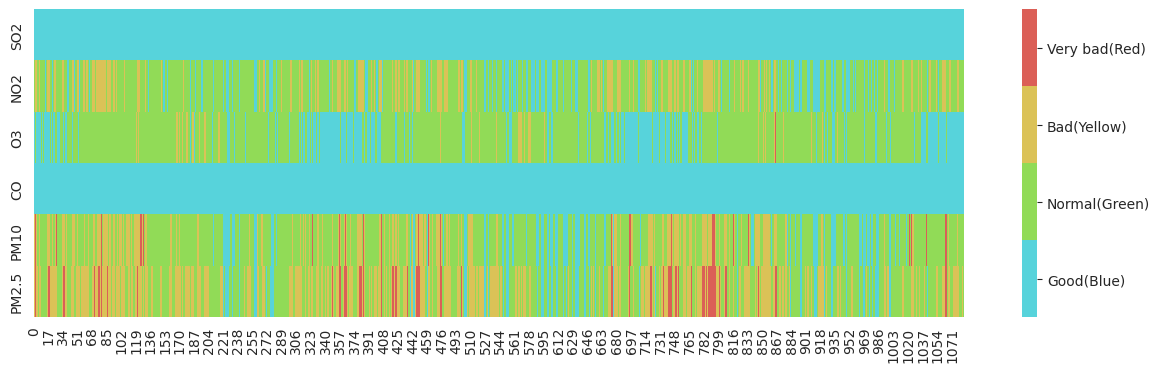

In [ ]:
plt.subplots(figsize=(15, 4))
ax = sns.heatmap(data_graded, cmap=grade_palette, yticklabels=parameter_names)
colorbar = ax.collections[0].colorbar
r = colorbar.vmax - colorbar.vmin
colorbar.set_ticks([colorbar.vmin + (colorbar.vmax - colorbar.vmin) / 4 * (0.5 + i) for i in range(4)])
colorbar.set_ticklabels(grade_names)

In [ ]:
def plot_data_with_ranges(df, parameter, color='black', ax=None):
  if ax is None:
    fig, ax = plt.subplots(figsize=(12, 5))

  ranges = air_quality_parameters.loc[parameter]
  crit_value = critical_concentrations_daily[parameter]
  min_max_date = [df['Date'][0], df['Date'][df.shape[0] - 1]]

  ax.fill_between(min_max_date, [ranges['Good(Blue)']] * 2, alpha=.3, color=grade_palette[0])
  ax.fill_between(min_max_date, [ranges['Good(Blue)']] * 2, [ranges['Normal(Green)']] * 2, alpha=.3, color=grade_palette[1])
  ax.fill_between(min_max_date, [ranges['Normal(Green)']] * 2, [ranges['Bad(Yellow)']] * 2, alpha=.3, color=grade_palette[2])
  ax.fill_between(min_max_date, [ranges['Bad(Yellow)']] * 2, [ranges['Very bad(Red)']] * 2, alpha=.3, color=grade_palette[3])
  ax.plot(min_max_date, [crit_value] * 2, color='black')

  g = sns.lineplot(df, x='Date', y=parameter, color=color, ax=ax)
  g.set(ylim=(0, df[parameter].max() * 1.1), xlim=tuple(min_max_date))

  legend_elements = [Line2D([0], [0], color=color, lw=2, label=parameter)]
  for k, g in enumerate(grade_names):
    legend_elements.append(Patch(color=grade_palette[k], alpha=0.3, label=g))
  legend_elements.append(Line2D([0], [0], color='black', lw=2, label='Bounded res'))
  ax.legend(handles=legend_elements, loc='upper right')

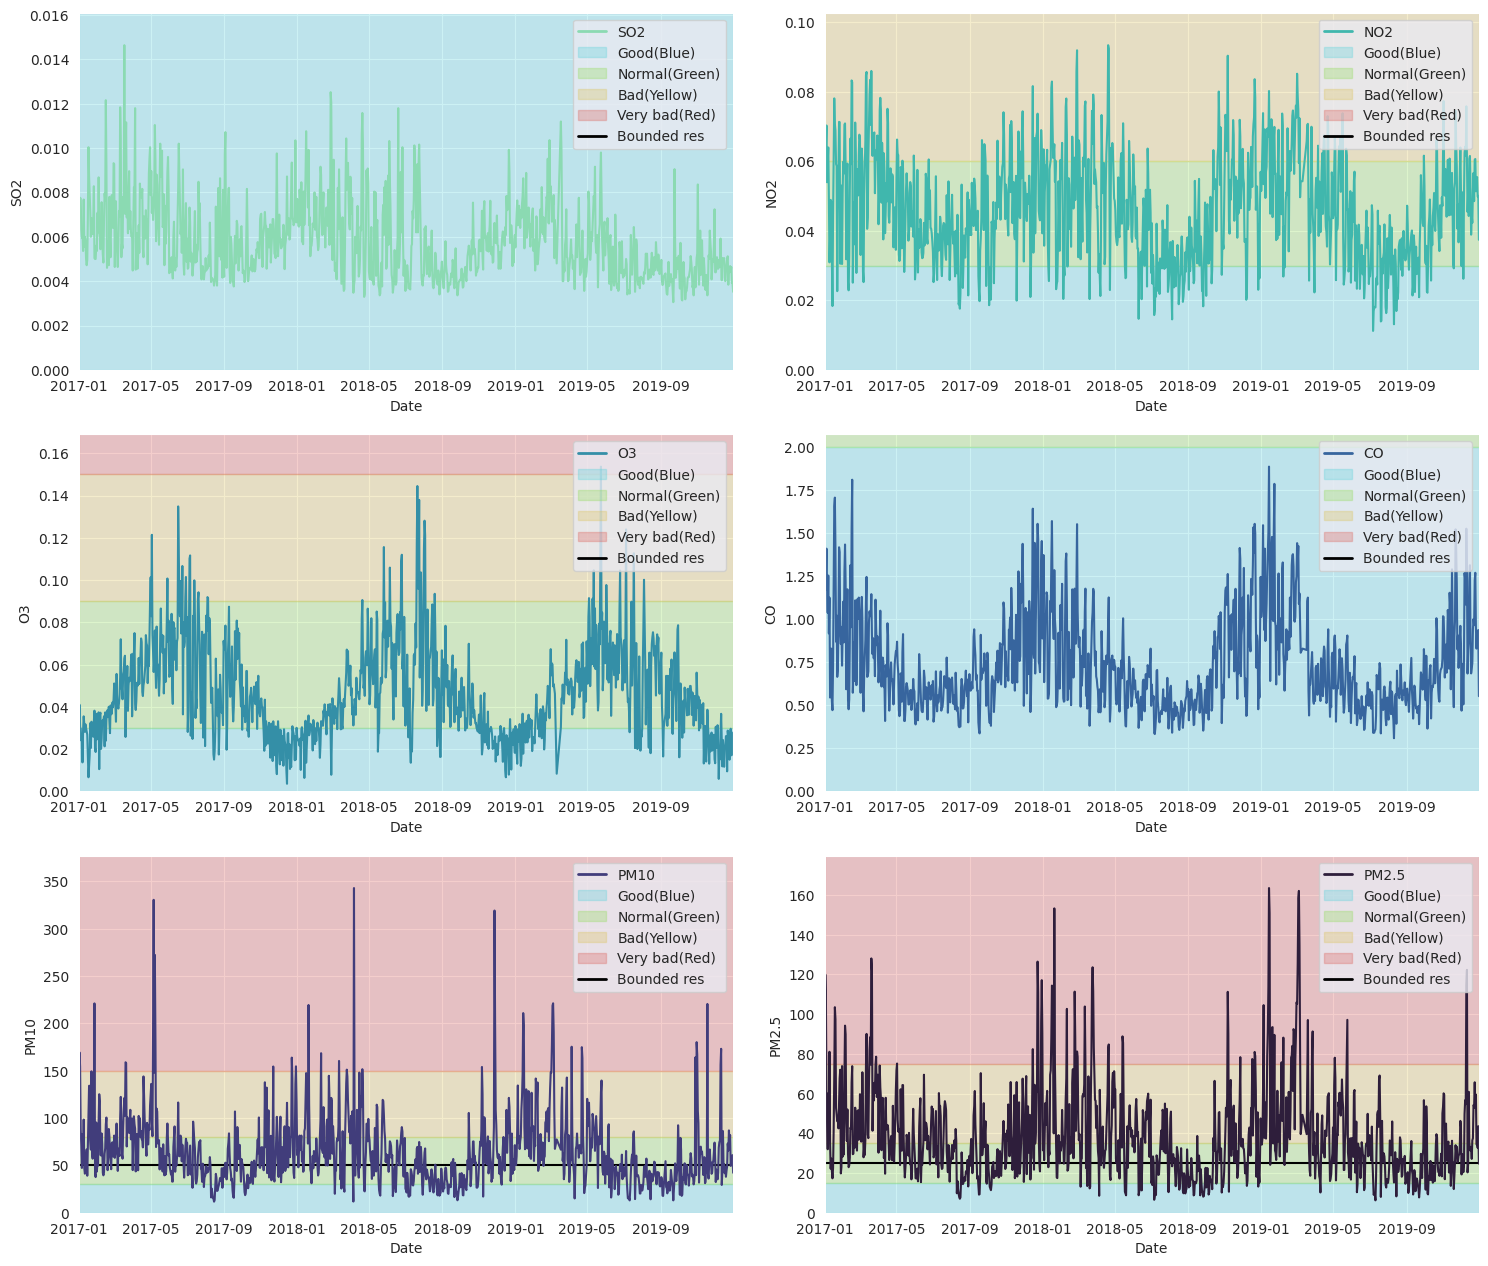

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
palette = sns.color_palette('mako_r', n_colors=len(parameter_names), as_cmap=False)

for ax, param, color in zip(axes.flat, parameter_names, palette):
  plot_data_with_ranges(data_daily, param, color, ax=ax)
fig.subplots_adjust(0, 0, 1, 1, .14, .18)

## **I. Географический анализ загрязнения воздуха в Сеуле**

In [ ]:
df = pd.merge(df_summary, df_station_info, on=['Station code', 'Address', 'Latitude', 'Longitude'], how='left')
df['Measurement date'] = pd.to_datetime(df['Measurement date'])
df['Year'] = df['Measurement date'].dt.year
df['Month'] = df['Measurement date'].dt.month
df['Day'] = df['Measurement date'].dt.day
df['Hour'] = df['Measurement date'].dt.hour

In [ ]:
district_pm25 = df.groupby('Station name(district)')['PM2.5'].mean().sort_values(ascending=False)
district_pm10 = df.groupby('Station name(district)')['PM10'].mean().sort_values(ascending=False)
district_so2 = df.groupby('Station name(district)')['SO2'].mean().sort_values(ascending=False)
district_no2 = df.groupby('Station name(district)')['NO2'].mean().sort_values(ascending=False)
district_o3 = df.groupby('Station name(district)')['O3'].mean().sort_values(ascending=False)
district_co = df.groupby('Station name(district)')['CO'].mean().sort_values(ascending=False)


<ipython-input-31-f879bb0e22f8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=district_pm25.index, x=district_pm25.values, palette='mako')


Text(0, 0.5, 'Район')

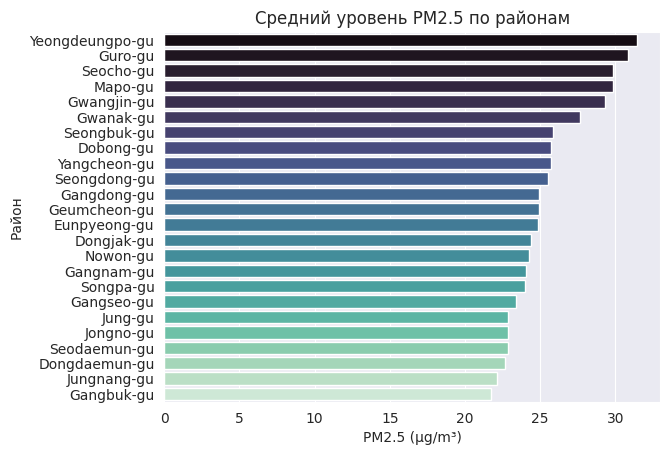

In [ ]:
sns.barplot(y=district_pm25.index, x=district_pm25.values, palette='mako')
plt.title('Средний уровень PM2.5 по районам')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('Район')

<ipython-input-32-25dc6c48b486>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=district_pm10.index, x=district_pm10.values, palette='rocket')


Text(0, 0.5, '')

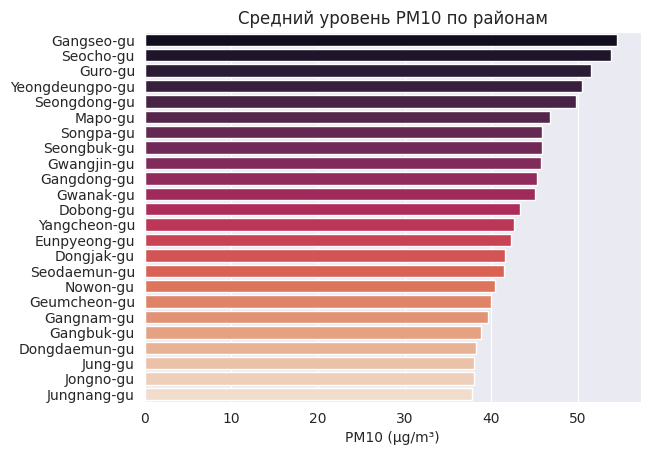

In [ ]:
sns.barplot(y=district_pm10.index, x=district_pm10.values, palette='rocket')
plt.title('Средний уровень PM10 по районам')
plt.xlabel('PM10 (µg/m³)')
plt.ylabel('')

<ipython-input-37-6233f96006dd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=district_so2.index, x=district_so2.values, palette='flare_r')


Text(0, 0.5, '')

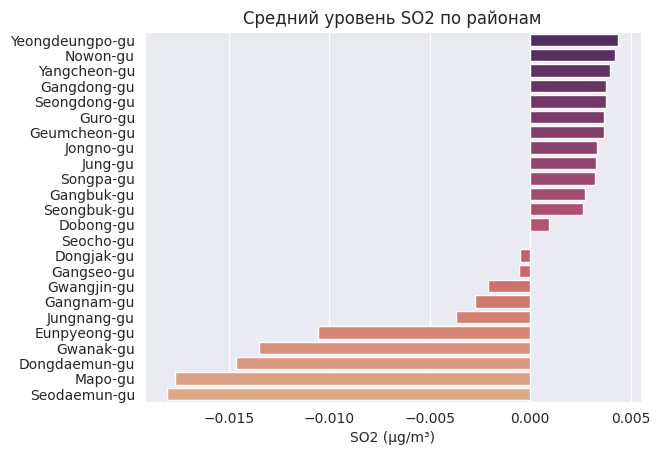

In [ ]:
sns.barplot(y=district_so2.index, x=district_so2.values, palette='flare_r')
plt.title('Средний уровень SO2 по районам')
plt.xlabel('SO2 (µg/m³)')
plt.ylabel('')

<ipython-input-34-490a7ffd1818>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=district_no2.index, x=district_no2.values, palette='magma')


Text(0, 0.5, '')

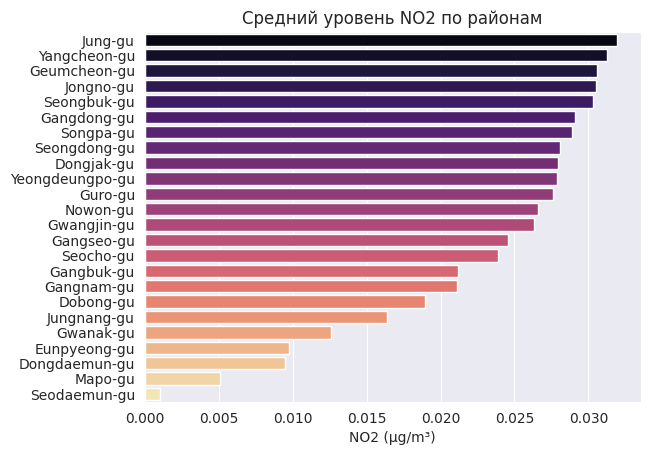

In [ ]:
sns.barplot(y=district_no2.index, x=district_no2.values, palette='magma')
plt.title('Средний уровень NO2 по районам')
plt.xlabel('NO2 (µg/m³)')
plt.ylabel('')

<ipython-input-35-44ae7f807aa4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=district_o3.index, x=district_o3.values, palette='Blues_r')


Text(0, 0.5, '')

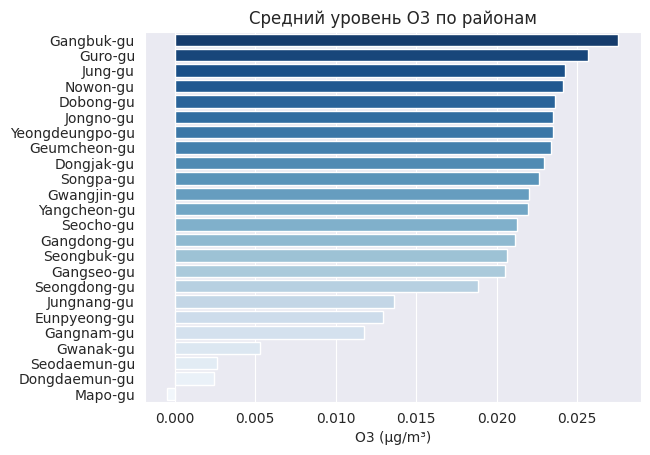

In [ ]:
sns.barplot(y=district_o3.index, x=district_o3.values, palette='Blues_r')
plt.title('Средний уровень O3 по районам')
plt.xlabel('O3 (µg/m³)')
plt.ylabel('')

<ipython-input-36-30cee320b047>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=district_co.index, x=district_co.values, palette='Greens_r')


Text(0, 0.5, '')

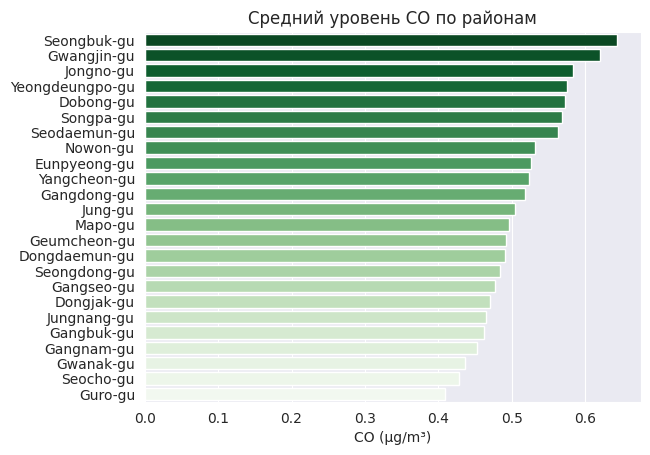

In [ ]:
sns.barplot(y=district_co.index, x=district_co.values, palette='Greens_r')
plt.title('Средний уровень CO по районам')
plt.xlabel('CO (µg/m³)')
plt.ylabel('')

Анализ превышений норм

In [ ]:
norms = {'PM2.5': 35, 'PM10': 50}
district_exceed = df.groupby('Station name(district)').agg(PM25_exceed=('PM2.5', lambda x: (x > norms['PM2.5']).mean() * 100), PM10_exceed=('PM10', lambda x: (x > norms['PM10']).mean() * 100)).sort_values('PM25_exceed', ascending=False)

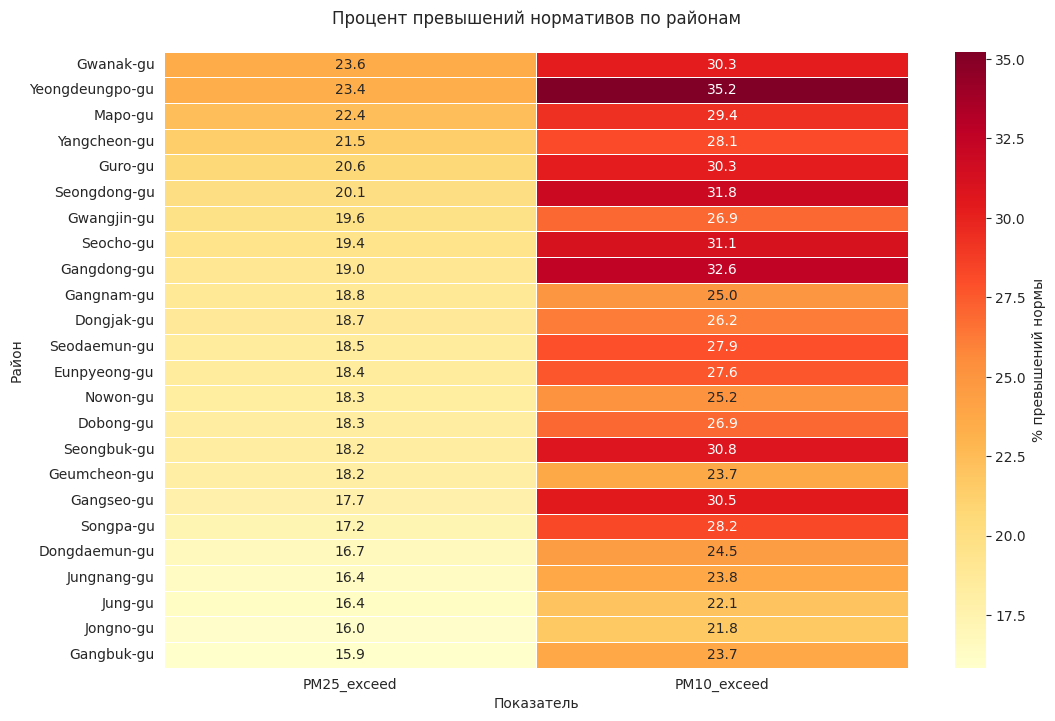

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(district_exceed,annot=True,fmt='.1f',cmap='YlOrRd',linewidths=0.5,cbar_kws={'label': '% превышений нормы'})
plt.title('Процент превышений нормативов по районам', pad=20)
plt.ylabel('Район')
plt.xlabel('Показатель')
plt.show()

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Do

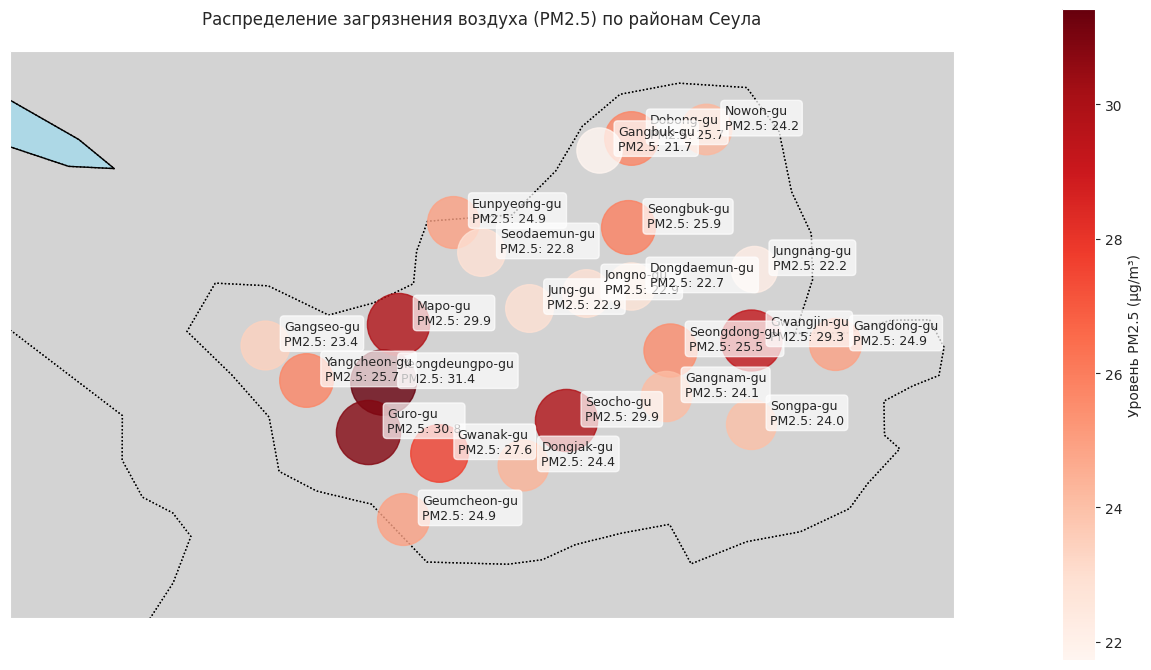

In [ ]:
district_avg = df.groupby('Station name(district)')[['PM2.5', 'PM10']].mean()
district_avg = district_avg.sort_values('PM2.5', ascending=False)
district_data = pd.merge(district_avg.reset_index(),df_station_info[['Station name(district)', 'Latitude', 'Longitude']].drop_duplicates(),on='Station name(district)')

plt.figure(figsize=(14, 12))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([126.7, 127.2, 37.4, 37.7], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':')

norm = Normalize(vmin=district_data['PM2.5'].min(), vmax=district_data['PM2.5'].max())
cmap = plt.get_cmap('Reds')

for idx, row in district_data.iterrows():
    ax.plot(row['Longitude'], row['Latitude'], 'o',color=cmap(norm(row['PM2.5'])),markersize=row['PM2.5']*1.5,transform=ccrs.PlateCarree(),alpha=0.8)
    ax.text(row['Longitude'] + 0.01, row['Latitude'],f"{row['Station name(district)']}\nPM2.5: {row['PM2.5']:.1f}",fontsize=9,transform=ccrs.PlateCarree(),bbox=dict(facecolor='white', alpha=0.7, boxstyle='round'))

sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.03, pad=0.1)
cbar.set_label('Уровень PM2.5 (µg/m³)')
plt.title('Распределение загрязнения воздуха (PM2.5) по районам Сеула', pad=20)
plt.show()

## **II. Сезонный анализ загрязнения воздуха в Сеуле**

<ipython-input-41-0712e08afec6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_yearly, x='month', y='SO2', palette='crest')


<Axes: xlabel='month', ylabel='SO2'>

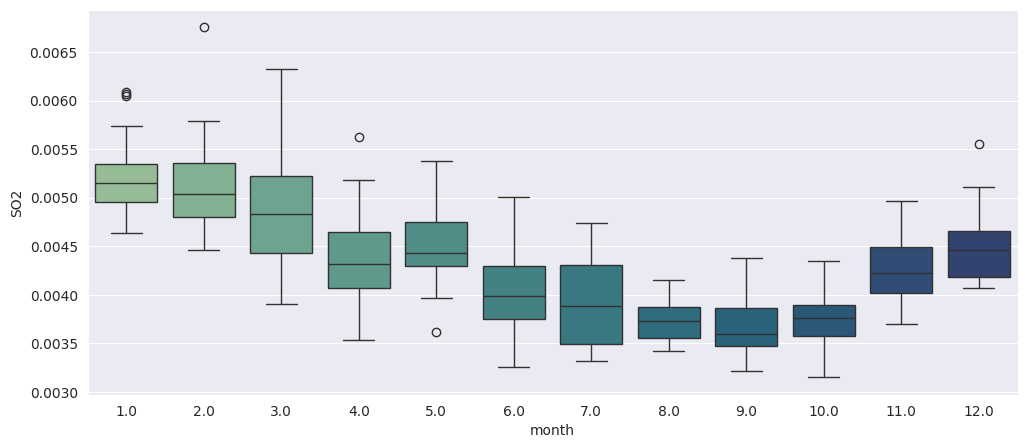

In [ ]:
data_yearly = data.groupby(['DOY']).mean(numeric_only=True)
plt.subplots(figsize=(12, 5))
sns.boxplot(data_yearly, x='month', y='SO2', palette='crest')

<ipython-input-42-5ed6b8bcac82>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_yearly, x='month', y='NO2', palette='crest')


<Axes: xlabel='month', ylabel='NO2'>

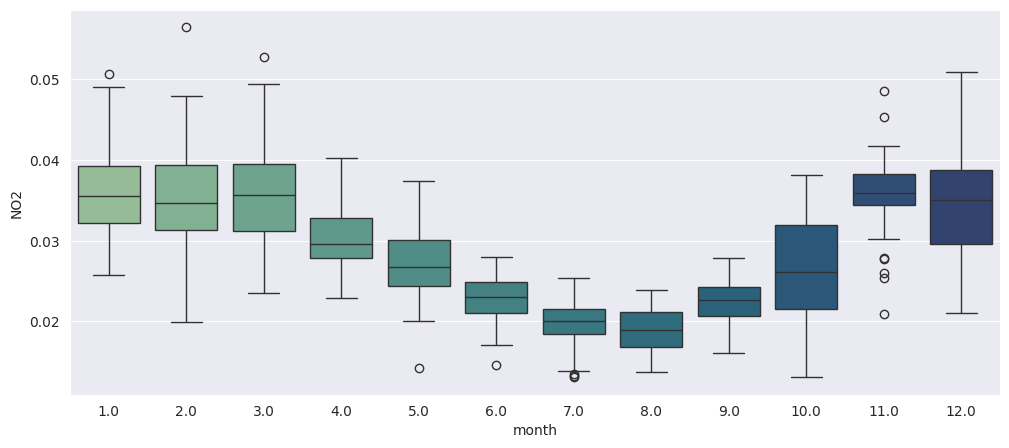

In [ ]:
data_yearly = data.groupby(['DOY']).mean(numeric_only=True)
plt.subplots(figsize=(12, 5))
sns.boxplot(data_yearly, x='month', y='NO2', palette='crest')

<ipython-input-43-af443608be5d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_yearly, x='month', y='CO', palette='crest')


<Axes: xlabel='month', ylabel='CO'>

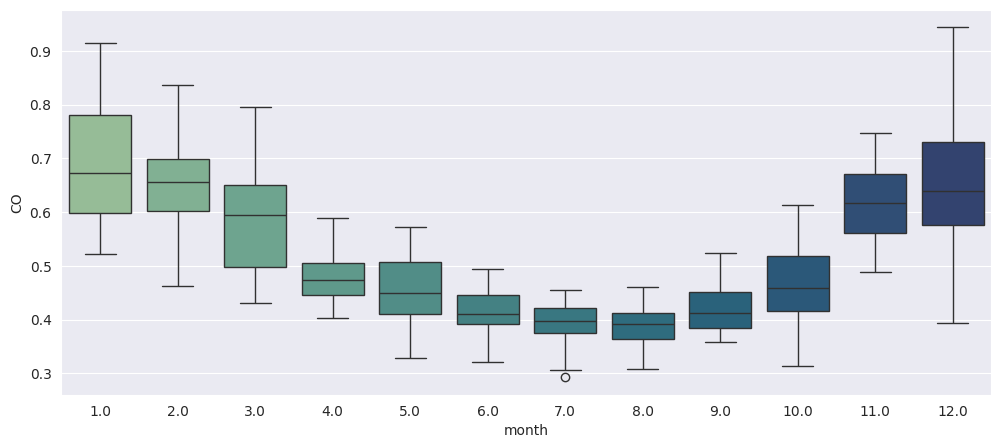

In [ ]:
data_yearly = data.groupby(['DOY']).mean(numeric_only=True)
plt.subplots(figsize=(12, 5))
sns.boxplot(data_yearly, x='month', y='CO', palette='crest')

<ipython-input-44-d5f24a019016>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_yearly, x='month', y='O3', palette='crest')


<Axes: xlabel='month', ylabel='O3'>

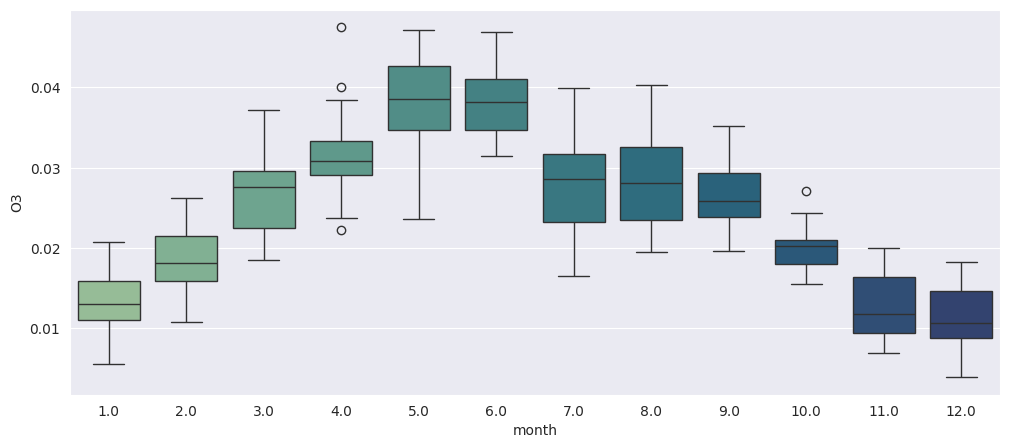

In [ ]:
data_yearly = data.groupby(['DOY']).mean(numeric_only=True)
plt.subplots(figsize=(12, 5))
sns.boxplot(data_yearly, x='month', y='O3', palette='crest')

<ipython-input-45-149b27c08412>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_yearly, x='month', y='PM10', palette='crest')


<Axes: xlabel='month', ylabel='PM10'>

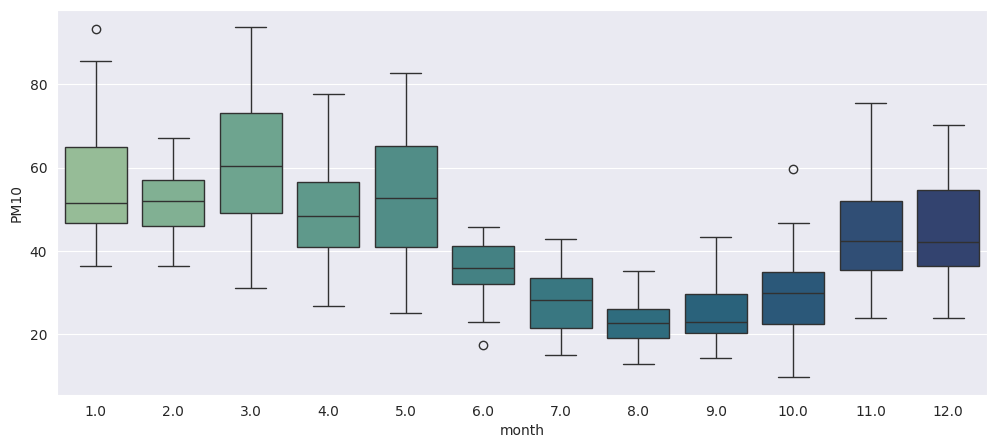

In [ ]:
data_yearly = data.groupby(['DOY']).mean(numeric_only=True)
plt.subplots(figsize=(12, 5))
sns.boxplot(data_yearly, x='month', y='PM10', palette='crest')

<ipython-input-46-4c1bc44c894d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_yearly, x='month', y='PM2.5', palette='crest')


<Axes: xlabel='month', ylabel='PM2.5'>

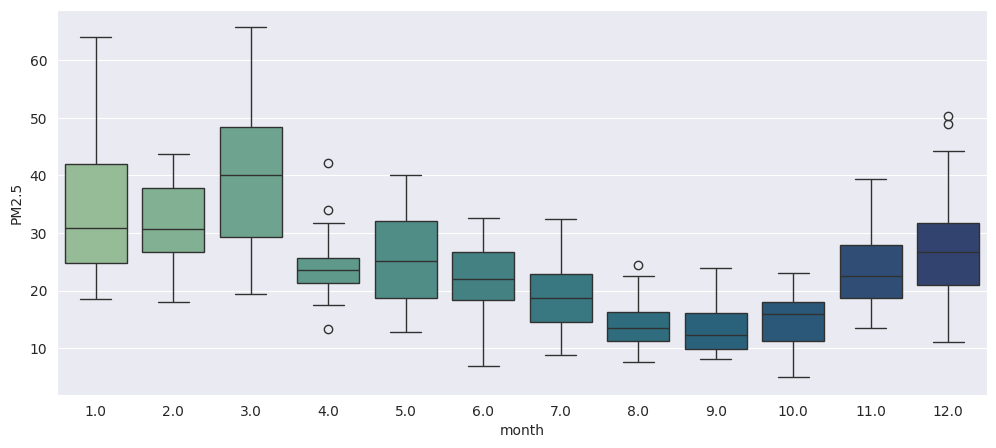

In [ ]:
data_yearly = data.groupby(['DOY']).mean(numeric_only=True)
plt.subplots(figsize=(12, 5))
sns.boxplot(data_yearly, x='month', y='PM2.5', palette='crest')

# График по дням недели

<ipython-input-47-c96c2204bc18>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_by_weekday, x='DOW', y='SO2', palette='crest')


<Axes: xlabel='DOW', ylabel='SO2'>

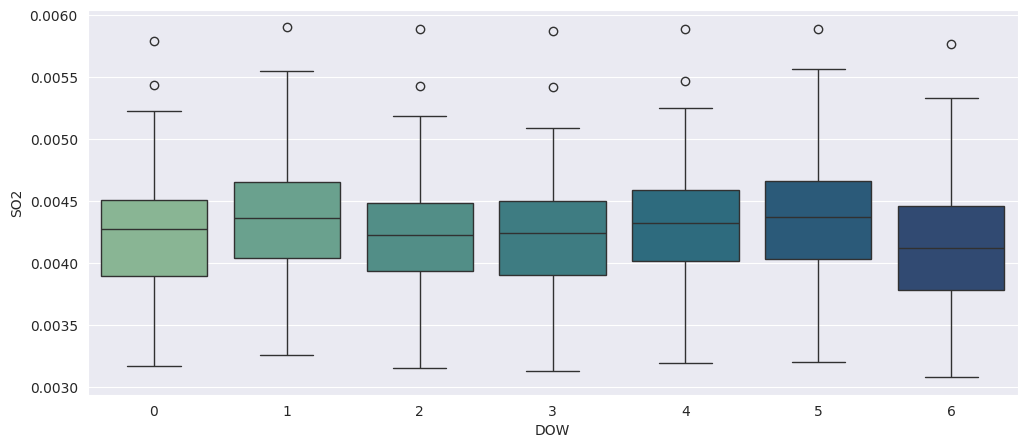

In [ ]:
data_by_weekday = data.groupby(['DOW', 'Station code']).mean(numeric_only=True).reset_index()
plt.subplots(figsize=(12, 5))
sns.boxplot(data_by_weekday, x='DOW', y='SO2', palette='crest')

<ipython-input-48-a8939a497457>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_by_weekday, x='DOW', y='NO2', palette='crest')


<Axes: xlabel='DOW', ylabel='NO2'>

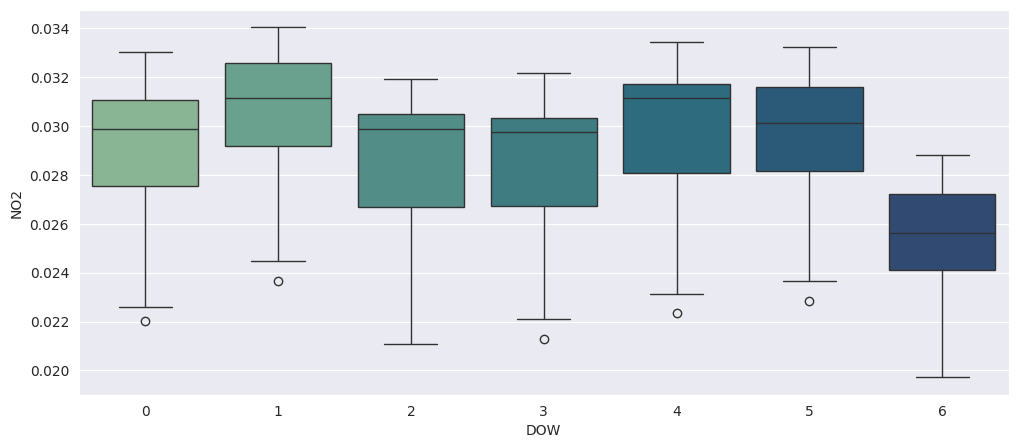

In [ ]:
data_by_weekday = data.groupby(['DOW', 'Station code']).mean(numeric_only=True).reset_index()
plt.subplots(figsize=(12, 5))
sns.boxplot(data_by_weekday, x='DOW', y='NO2', palette='crest')

<ipython-input-49-ad271e64d0b6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_by_weekday, x='DOW', y='CO', palette='crest')


<Axes: xlabel='DOW', ylabel='CO'>

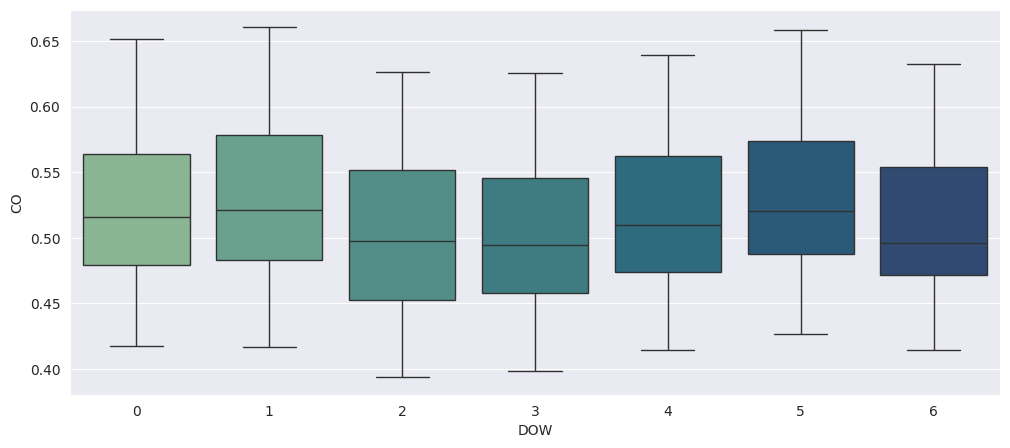

In [ ]:
data_by_weekday = data.groupby(['DOW', 'Station code']).mean(numeric_only=True).reset_index()
plt.subplots(figsize=(12, 5))
sns.boxplot(data_by_weekday, x='DOW', y='CO', palette='crest')

<ipython-input-50-31a8bd78bf17>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_by_weekday, x='DOW', y='O3', palette='crest')


<Axes: xlabel='DOW', ylabel='O3'>

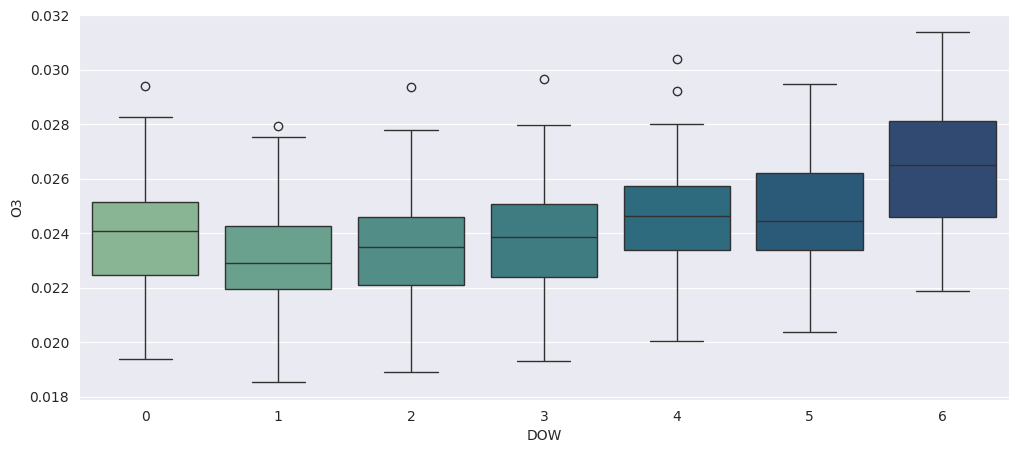

In [ ]:
data_by_weekday = data.groupby(['DOW', 'Station code']).mean(numeric_only=True).reset_index()
plt.subplots(figsize=(12, 5))
sns.boxplot(data_by_weekday, x='DOW', y='O3', palette='crest')

<ipython-input-51-4a0cc9684131>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_by_weekday, x='DOW', y='PM10', palette='crest')


<Axes: xlabel='DOW', ylabel='PM10'>

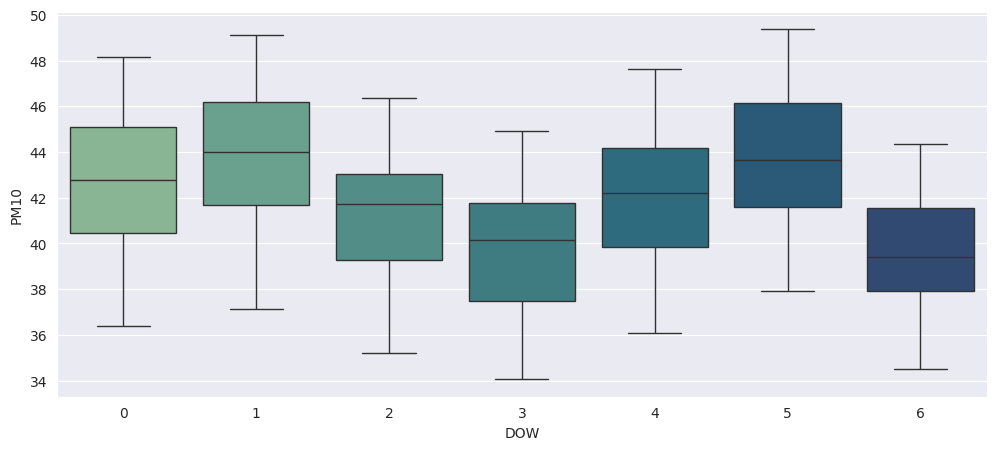

In [ ]:
data_by_weekday = data.groupby(['DOW', 'Station code']).mean(numeric_only=True).reset_index()
plt.subplots(figsize=(12, 5))
sns.boxplot(data_by_weekday, x='DOW', y='PM10', palette='crest')

<ipython-input-52-694f431af739>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_by_weekday, x='DOW', y='PM2.5', palette='crest')


<Axes: xlabel='DOW', ylabel='PM2.5'>

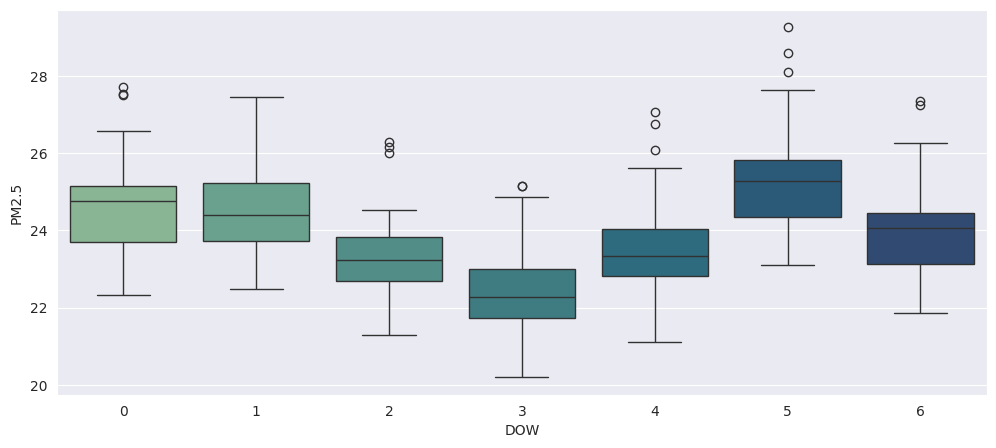

In [ ]:
data_by_weekday = data.groupby(['DOW', 'Station code']).mean(numeric_only=True).reset_index()
plt.subplots(figsize=(12, 5))
sns.boxplot(data_by_weekday, x='DOW', y='PM2.5', palette='crest')

# Суточные закономерности в зависимости от сезона

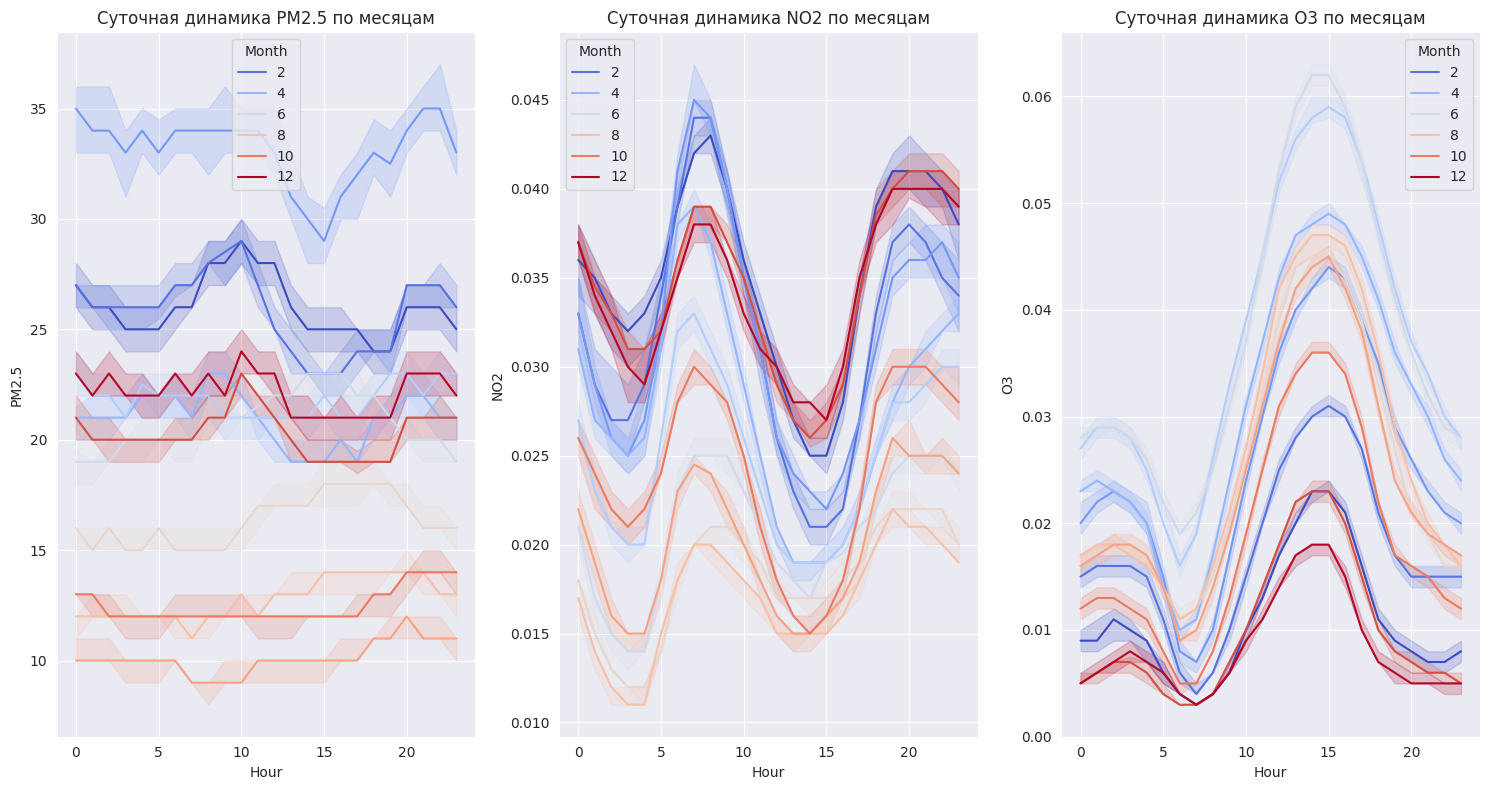

In [ ]:
df['Hour'] = df['Measurement date'].dt.hour
df['Month'] = df['Measurement date'].dt.month

plt.figure(figsize=(15, 8))
for i, col in enumerate(['PM2.5', 'NO2', 'O3'], 1):
    plt.subplot(1, 3, i)
    sns.lineplot(data=df, x='Hour', y=col, hue='Month', palette='coolwarm', estimator='median')
    plt.title(f'Суточная динамика {col} по месяцам')
plt.tight_layout()
plt.show()

##**III. Анализ корреляций между загрязняющими веществами**

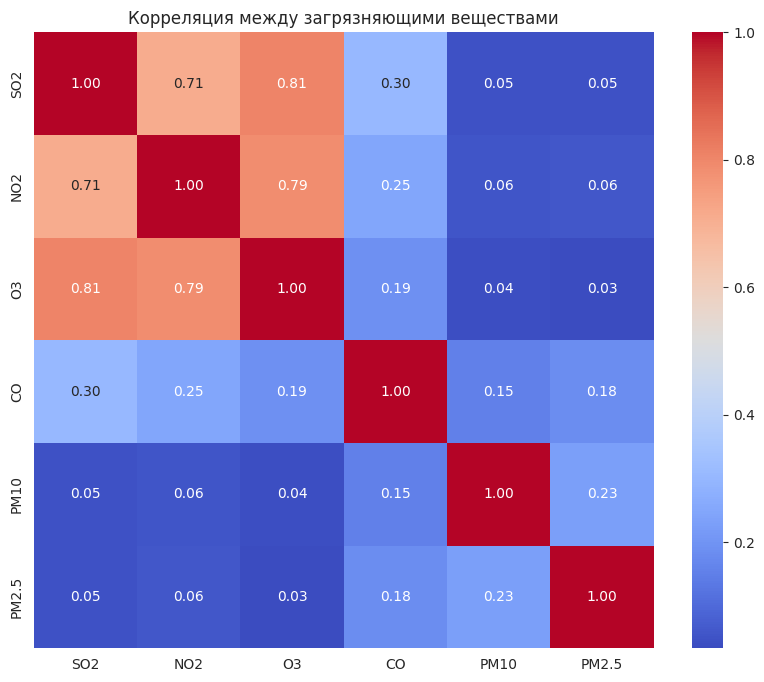

In [ ]:
corr_matrix = df[['SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция между загрязняющими веществами')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# Выбор признаков и целевой переменной
features = ['SO2', 'NO2', 'O3', 'CO', 'PM10']
target = 'PM2.5'

# Удаление пропущенных значений
data_clean = df_summary[features + [target]].dropna()

# Разделение на обучающую и тестовую выборки
X = data_clean[features]
y = data_clean[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Линейная регрессия:
MSE: 1749.66
MAE: 12.10
R²: 0.07


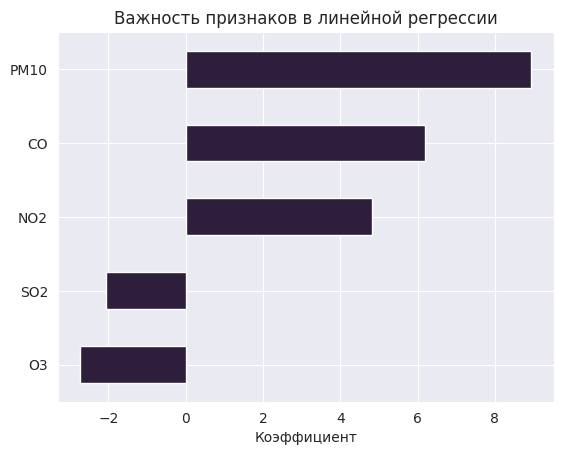

In [ ]:
# Создание и обучение модели
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Прогнозирование
y_pred_lr = lr.predict(X_test_scaled)

# Оценка качества
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Линейная регрессия:")
print(f"MSE: {mse_lr:.2f}")
print(f"MAE: {mae_lr:.2f}")
print(f"R²: {r2_lr:.2f}")

# Визуализация важности признаков
coeffs = pd.Series(lr.coef_, index=features)
coeffs.sort_values().plot(kind='barh')
plt.title('Важность признаков в линейной регрессии')
plt.xlabel('Коэффициент')
plt.show()

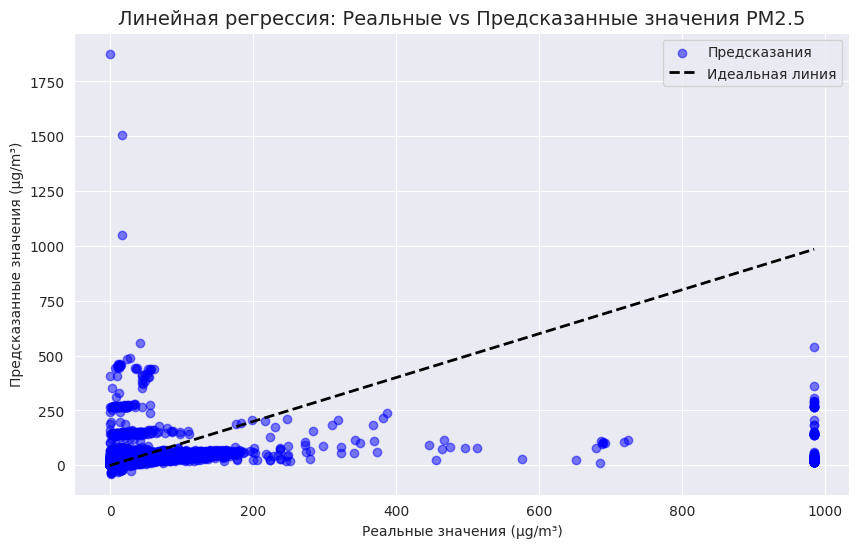

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='blue', label='Предсказания')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'k--', lw=2, label='Идеальная линия')
plt.title('Линейная регрессия: Реальные vs Предсказанные значения PM2.5', fontsize=14)
plt.xlabel('Реальные значения (µg/m³)')
plt.ylabel('Предсказанные значения (µg/m³)')
plt.legend()
plt.grid(True)
plt.show()


kNN Регрессия:
Оптимальное k: 20
MSE: 1611.41
MAE: 8.55
R²: 0.14


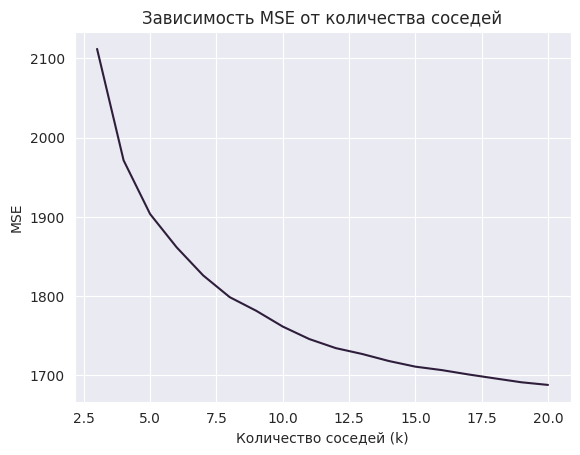

In [ ]:
# Подбор оптимального количества соседей
param_grid = {'n_neighbors': range(3, 21)}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Лучшие параметры
best_k = grid_search.best_params_['n_neighbors']
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

# Прогнозирование
y_pred_knn = knn.predict(X_test_scaled)

# Оценка качества
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("\nkNN Регрессия:")
print(f"Оптимальное k: {best_k}")
print(f"MSE: {mse_knn:.2f}")
print(f"MAE: {mae_knn:.2f}")
print(f"R²: {r2_knn:.2f}")

# График зависимости MSE от k
results = pd.DataFrame(grid_search.cv_results_)
plt.plot(param_grid['n_neighbors'], -results['mean_test_score'])
plt.title('Зависимость MSE от количества соседей')
plt.xlabel('Количество соседей (k)')
plt.ylabel('MSE')
plt.show()

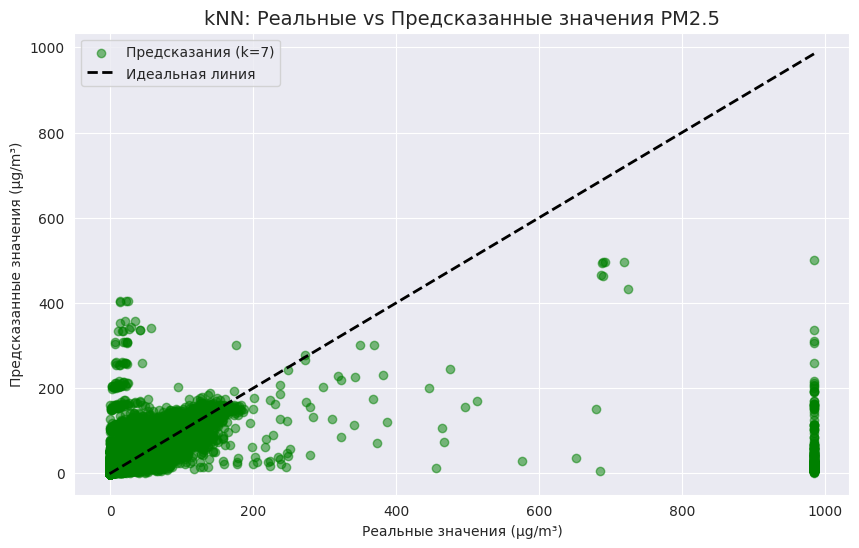

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.5, color='green', label='Предсказания (k=7)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'k--', lw=2, label='Идеальная линия')
plt.title('kNN: Реальные vs Предсказанные значения PM2.5', fontsize=14)
plt.xlabel('Реальные значения (µg/m³)')
plt.ylabel('Предсказанные значения (µg/m³)')
plt.legend()
plt.grid(True)
plt.show()


Random Forest:
MSE: 1944.89
MAE: 9.28
R²: -0.04


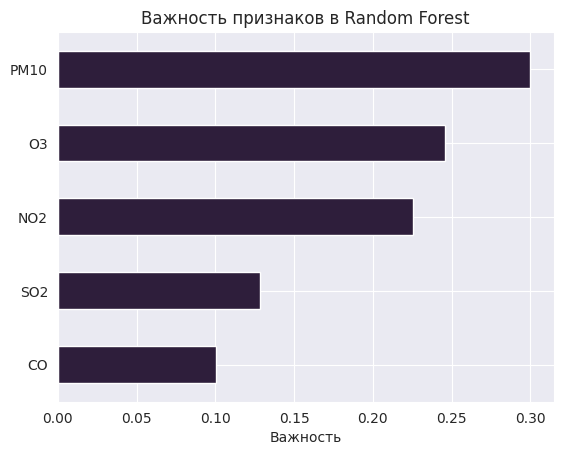

In [ ]:
# Создание и обучение модели
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Прогнозирование
y_pred_rf = rf.predict(X_test)

# Оценка качества
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest:")
print(f"MSE: {mse_rf:.2f}")
print(f"MAE: {mae_rf:.2f}")
print(f"R²: {r2_rf:.2f}")

# Важность признаков
importances = pd.Series(rf.feature_importances_, index=features)
importances.sort_values().plot(kind='barh')
plt.title('Важность признаков в Random Forest')
plt.xlabel('Важность')
plt.show()

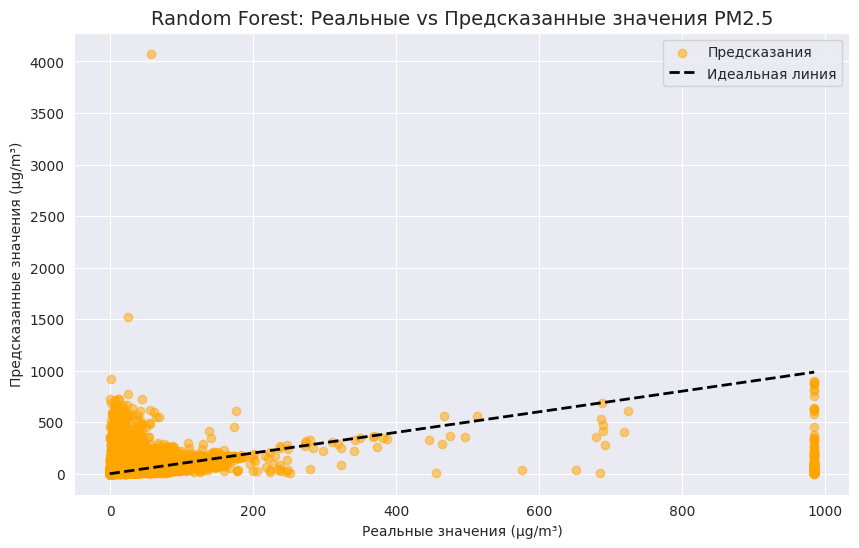

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='orange', label='Предсказания')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'k--', lw=2, label='Идеальная линия')
plt.title('Random Forest: Реальные vs Предсказанные значения PM2.5', fontsize=14)
plt.xlabel('Реальные значения (µg/m³)')
plt.ylabel('Предсказанные значения (µg/m³)')
plt.legend()
plt.grid(True)
plt.show()

               Model          MSE        MAE        R²
0  Linear Regression  1749.663972  12.099385  0.068590
1                kNN  1611.410013   8.548744  0.142188
2      Random Forest  1944.888003   9.277463 -0.035335


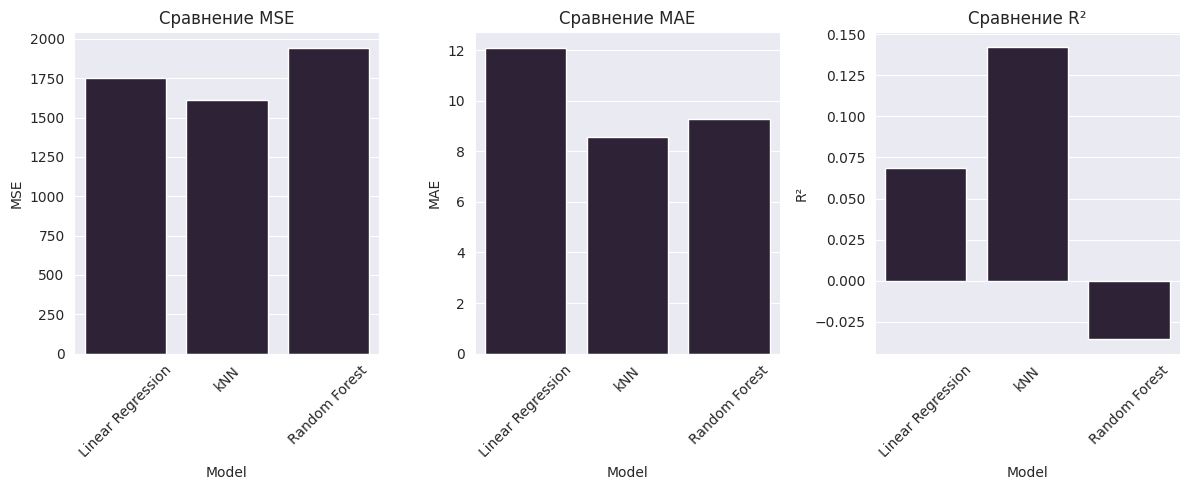

In [ ]:
metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'kNN', 'Random Forest'],
    'MSE': [mse_lr, mse_knn, mse_rf],
    'MAE': [mae_lr, mae_knn, mae_rf],
    'R²': [r2_lr, r2_knn, r2_rf]
})

print(metrics)

# Визуализация сравнения
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='MSE', data=metrics)
plt.title('Сравнение MSE')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='MAE', data=metrics)
plt.title('Сравнение MAE')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='R²', data=metrics)
plt.title('Сравнение R²')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

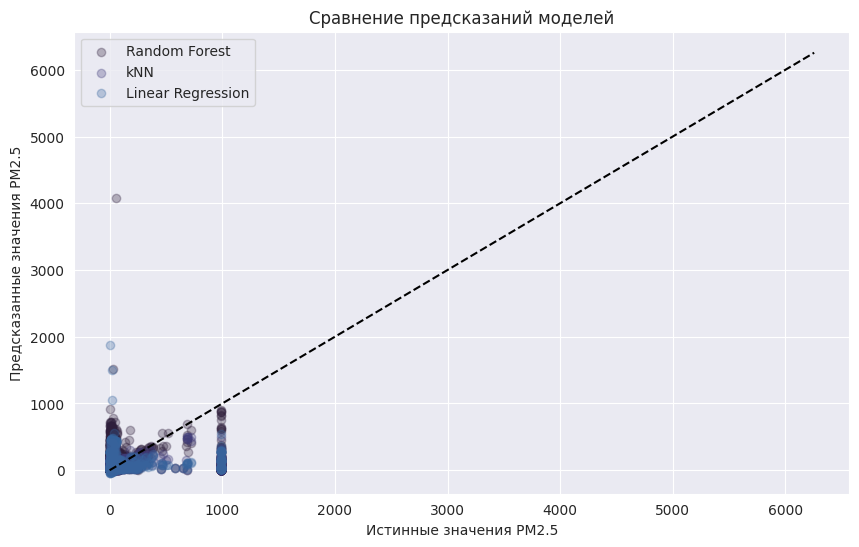

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.3, label='Random Forest')
plt.scatter(y_test, y_pred_knn, alpha=0.3, label='kNN')
plt.scatter(y_test, y_pred_lr, alpha=0.3, label='Linear Regression')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel('Истинные значения PM2.5')
plt.ylabel('Предсказанные значения PM2.5')
plt.title('Сравнение предсказаний моделей')
plt.legend()
plt.grid(True)
plt.show()

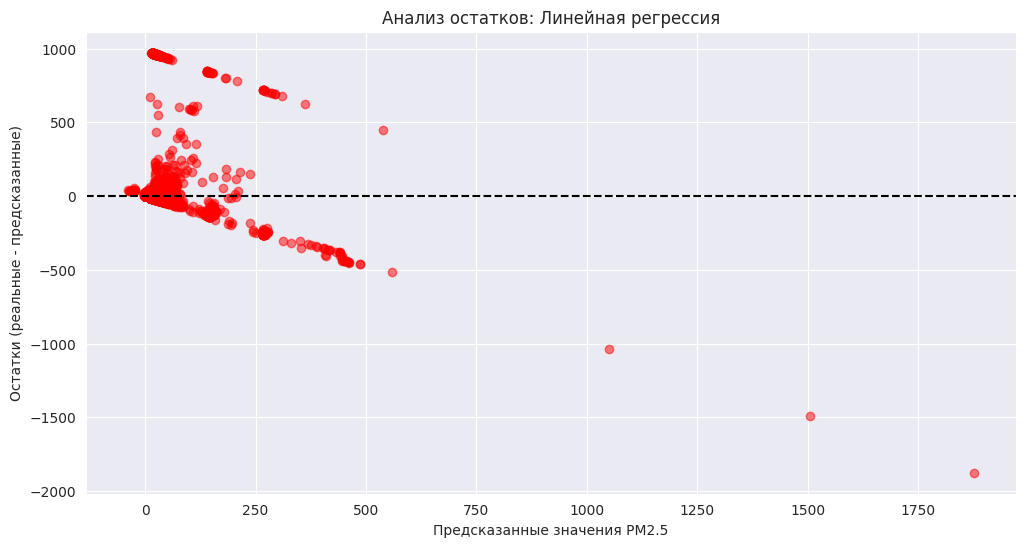

Средний остаток: 0.01
Стандартное отклонение остатков: 41.83


In [ ]:
residuals_lr = y_test - y_pred_lr

plt.figure(figsize=(12, 6))
plt.scatter(y_pred_lr, residuals_lr, alpha=0.5, color = 'Red')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Анализ остатков: Линейная регрессия')
plt.xlabel('Предсказанные значения PM2.5')
plt.ylabel('Остатки (реальные - предсказанные)')
plt.grid(True)
plt.show()

print(f"Средний остаток: {residuals_lr.mean():.2f}")
print(f"Стандартное отклонение остатков: {residuals_lr.std():.2f}")

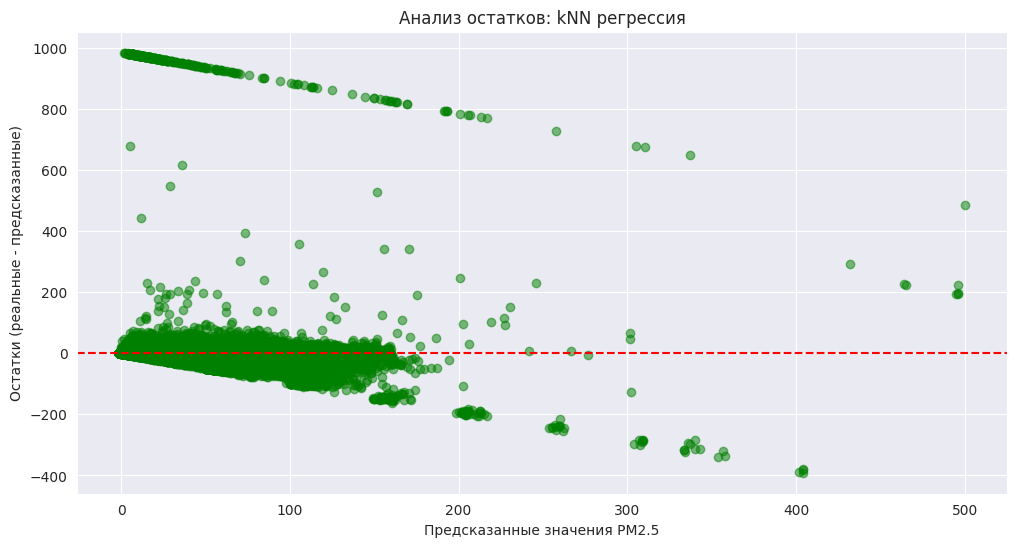

Средний остаток: 0.03
Стандартное отклонение остатков: 40.14


In [ ]:
residuals_knn = y_test - y_pred_knn

plt.figure(figsize=(12, 6))
plt.scatter(y_pred_knn, residuals_knn, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Анализ остатков: kNN регрессия')
plt.xlabel('Предсказанные значения PM2.5')
plt.ylabel('Остатки (реальные - предсказанные)')
plt.grid(True)
plt.show()

print(f"Средний остаток: {residuals_knn.mean():.2f}")
print(f"Стандартное отклонение остатков: {residuals_knn.std():.2f}")

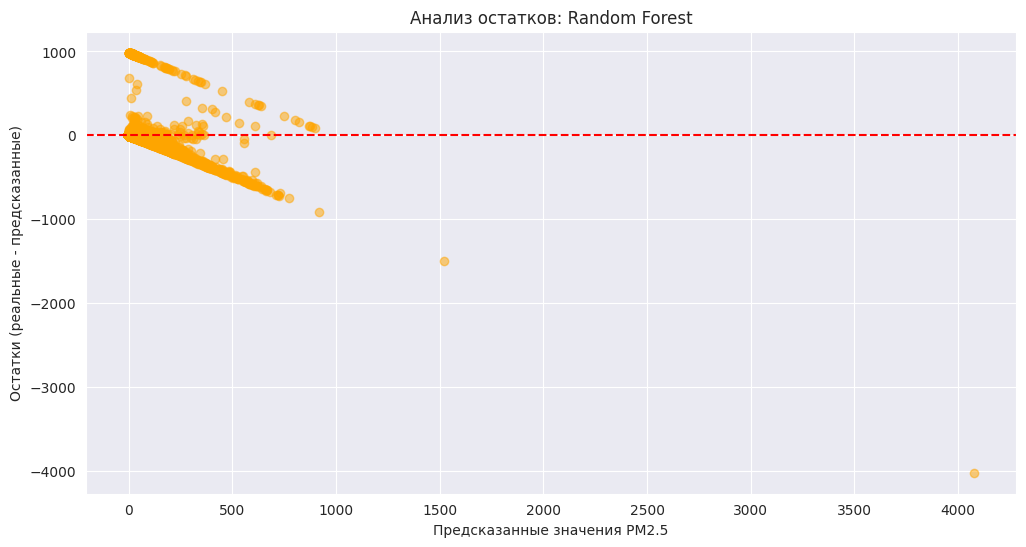

Средний остаток: -0.77
Стандартное отклонение остатков: 44.09


In [ ]:
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(12, 6))
plt.scatter(y_pred_rf, residuals_rf, alpha=0.5, color='orange')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Анализ остатков: Random Forest')
plt.xlabel('Предсказанные значения PM2.5')
plt.ylabel('Остатки (реальные - предсказанные)')
plt.grid(True)
plt.show()

print(f"Средний остаток: {residuals_rf.mean():.2f}")
print(f"Стандартное отклонение остатков: {residuals_rf.std():.2f}")

In [ ]:
from sklearn.metrics import explained_variance_score, median_absolute_error

def print_metrics(y_true, y_pred, model_name):
    print(f"\nМетрики для {model_name}:")
    print(f"Explained Variance: {explained_variance_score(y_true, y_pred):.2f}")
    print(f"Median Absolute Error: {median_absolute_error(y_true, y_pred):.2f}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"Mean Squared Error: {mean_squared_error(y_true, y_pred):.2f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.2f}")

print_metrics(y_test, y_pred_lr, "Linear Regression")
print_metrics(y_test, y_pred_knn, "kNN")
print_metrics(y_test, y_pred_rf, "Random Forest")


Метрики для Linear Regression:
Explained Variance: 0.07
Median Absolute Error: 8.51
Mean Absolute Error: 12.10
Mean Squared Error: 1749.66
R² Score: 0.07

Метрики для kNN:
Explained Variance: 0.14
Median Absolute Error: 3.95
Mean Absolute Error: 8.55
Mean Squared Error: 1611.41
R² Score: 0.14

Метрики для Random Forest:
Explained Variance: -0.04
Median Absolute Error: 4.20
Mean Absolute Error: 9.28
Mean Squared Error: 1944.89
R² Score: -0.04


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
measurement_summary = pd.read_csv('Measurement_summary.csv')
measurement_item_info = pd.read_csv('Measurement_item_info.csv')

# Получаем пороги для PM2.5
pm25_info = measurement_item_info[measurement_item_info['Item name'] == 'PM2.5']
thresholds = pm25_info[['Good(Blue)', 'Normal(Green)', 'Bad(Yellow)', 'Very bad(Red)']].values.flatten()

# Функция для классификации PM2.5
def classify_pm25(value):
    if value <= thresholds[0]:
        return 'Good'
    elif value <= thresholds[1]:
        return 'Normal'
    elif value <= thresholds[2]:
        return 'Bad'
    else:
        return 'Very bad'

measurement_summary['PM2.5 Class'] = measurement_summary['PM2.5'].apply(classify_pm25)

# Признаки и целевая переменная
X = measurement_summary[['SO2', 'NO2', 'O3', 'CO', 'PM10']]
y = measurement_summary['PM2.5 Class']

# Кодируем классы (Good=0, Normal=1, Bad=2, Very bad=3)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


=== Логистическая регрессия ===
Accuracy: 0.6873371976896229
Precision (macro): 0.545445128703609
Recall (macro): 0.4747177865187723
F1-Score (macro): 0.47844374500992226
ROC-AUC (ovr): 0.8806502193156305


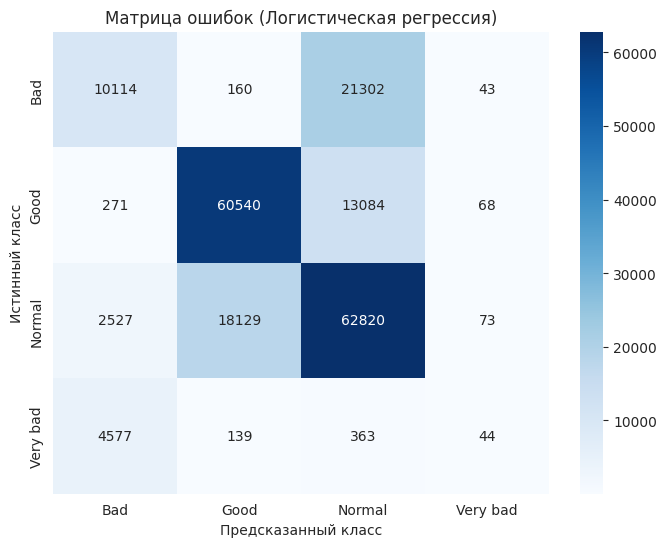


Classification Report:
              precision    recall  f1-score   support

         Bad       0.58      0.32      0.41     31619
        Good       0.77      0.82      0.79     73963
      Normal       0.64      0.75      0.69     83549
    Very bad       0.19      0.01      0.02      5123

    accuracy                           0.69    194254
   macro avg       0.55      0.47      0.48    194254
weighted avg       0.67      0.69      0.67    194254



In [ ]:
# Обучение модели
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Предсказания
y_pred_log = log_reg.predict(X_test_scaled)
y_proba_log = log_reg.predict_proba(X_test_scaled)

# Метрики
print("=== Логистическая регрессия ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision (macro):", precision_score(y_test, y_pred_log, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_log, average='macro'))
print("F1-Score (macro):", f1_score(y_test, y_pred_log, average='macro'))
print("ROC-AUC (ovr):", roc_auc_score(y_test, y_proba_log, multi_class='ovr'))

# Матрица ошибок
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Матрица ошибок (Логистическая регрессия)")
plt.xlabel("Предсказанный класс")
plt.ylabel("Истинный класс")
plt.show()

# Отчет по классификации
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log, target_names=label_encoder.classes_))

=== KNN (k=5) ===
Accuracy: 0.7337146210631441
Precision (macro): 0.7202510236417956
Recall (macro): 0.6930626641225701
F1-Score (macro): 0.7053730398463454
ROC-AUC (ovr): 0.8860601153780329


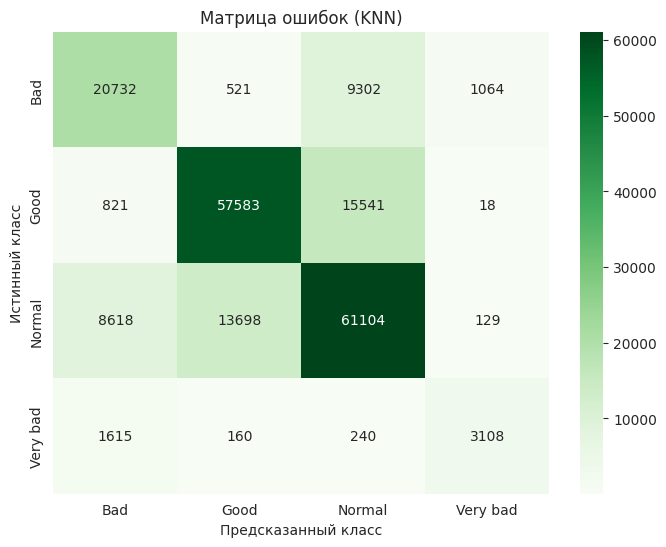


Classification Report:
              precision    recall  f1-score   support

         Bad       0.65      0.66      0.65     31619
        Good       0.80      0.78      0.79     73963
      Normal       0.71      0.73      0.72     83549
    Very bad       0.72      0.61      0.66      5123

    accuracy                           0.73    194254
   macro avg       0.72      0.69      0.71    194254
weighted avg       0.73      0.73      0.73    194254



In [ ]:
# Обучение модели
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Предсказания
y_pred_knn = knn.predict(X_test_scaled)
y_proba_knn = knn.predict_proba(X_test_scaled)

# Метрики
print("=== KNN (k=5) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision (macro):", precision_score(y_test, y_pred_knn, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_knn, average='macro'))
print("F1-Score (macro):", f1_score(y_test, y_pred_knn, average='macro'))
print("ROC-AUC (ovr):", roc_auc_score(y_test, y_proba_knn, multi_class='ovr'))

# Матрица ошибок
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Матрица ошибок (KNN)")
plt.xlabel("Предсказанный класс")
plt.ylabel("Истинный класс")
plt.show()

# Отчет по классификации
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_))

=== Random Forest ===
Accuracy: 0.7355730126535361
Precision (macro): 0.7259837835829319
Recall (macro): 0.7015169119534753
F1-Score (macro): 0.7127750663351549
ROC-AUC (ovr): 0.9121539789863153


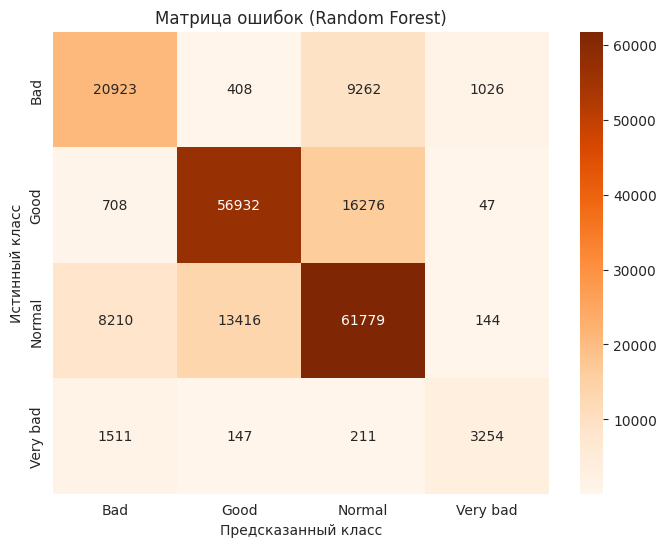


Classification Report:
              precision    recall  f1-score   support

         Bad       0.67      0.66      0.66     31619
        Good       0.80      0.77      0.79     73963
      Normal       0.71      0.74      0.72     83549
    Very bad       0.73      0.64      0.68      5123

    accuracy                           0.74    194254
   macro avg       0.73      0.70      0.71    194254
weighted avg       0.74      0.74      0.74    194254



In [ ]:
# Обучение модели
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Предсказания
y_pred_rf = rf.predict(X_test_scaled)
y_proba_rf = rf.predict_proba(X_test_scaled)

# Метрики
print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision (macro):", precision_score(y_test, y_pred_rf, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_rf, average='macro'))
print("F1-Score (macro):", f1_score(y_test, y_pred_rf, average='macro'))
print("ROC-AUC (ovr):", roc_auc_score(y_test, y_proba_rf, multi_class='ovr'))

# Матрица ошибок
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Матрица ошибок (Random Forest)")
plt.xlabel("Предсказанный класс")
plt.ylabel("Истинный класс")
plt.show()

# Отчет по классификации
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

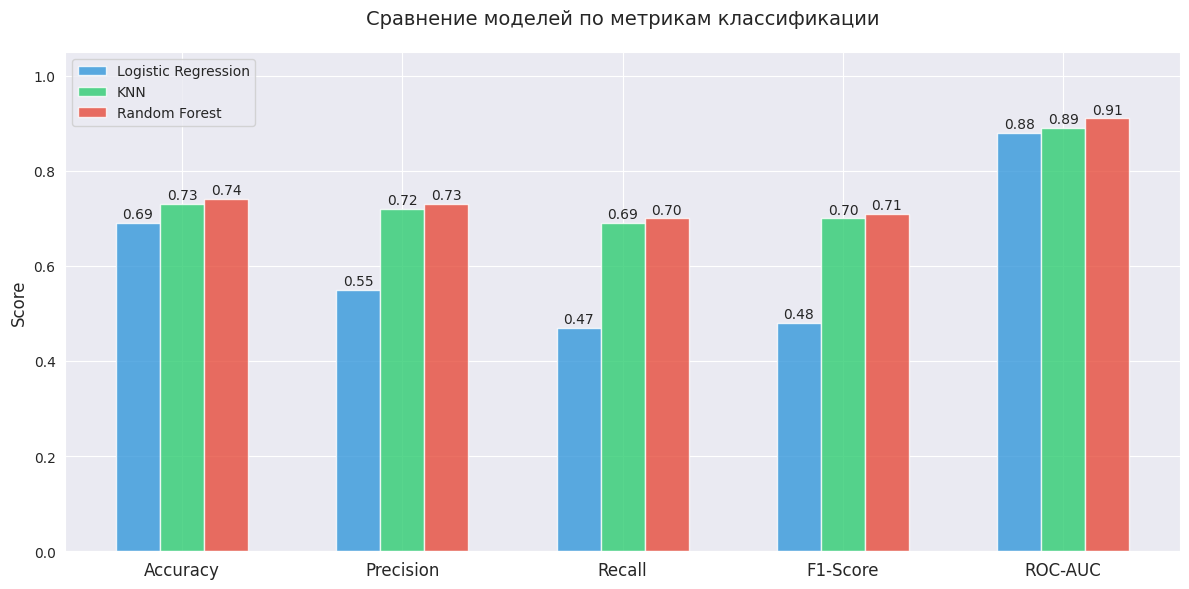

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Данные для сравнения (примерные значения, замените на свои реальные метрики)
metrics = {
    'Logistic Regression': {
        'Accuracy': 0.69,
        'Precision': 0.55,
        'Recall': 0.47,
        'F1-Score': 0.48,
        'ROC-AUC': 0.88
    },
    'KNN': {
        'Accuracy': 0.73,
        'Precision': 0.72,
        'Recall': 0.69,
        'F1-Score': 0.70,
        'ROC-AUC': 0.89
    },
    'Random Forest': {
        'Accuracy': 0.74,
        'Precision': 0.73,
        'Recall': 0.70,
        'F1-Score': 0.71,
        'ROC-AUC': 0.91
    }
}

# Создаем данные для графика
models = list(metrics.keys())
metric_names = list(metrics['Logistic Regression'].keys())
values = np.array([[metrics[model][metric] for metric in metric_names] for model in models])

# Настройка стиля
colors = ['#3498db', '#2ecc71', '#e74c3c']  # Синий, зеленый, красный

# Построение графика
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.2
x = np.arange(len(metric_names))

for i, model in enumerate(models):
    ax.bar(
        x + i * bar_width,
        values[i],
        width=bar_width,
        label=model,
        color=colors[i],
        alpha=0.8
    )

# Настройка осей и легенды
ax.set_xticks(x + bar_width)
ax.set_xticklabels(metric_names, fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Сравнение моделей по метрикам классификации', fontsize=14, pad=20)
ax.legend(fontsize=10)

# Добавляем значения на столбцы
for i in range(len(models)):
    for j in range(len(metric_names)):
        ax.text(
            x[j] + i * bar_width,
            values[i][j] + 0.01,
            f'{values[i][j]:.2f}',
            ha='center',
            fontsize=10
        )

plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()